In [151]:
import pandas as pd
import requests as r
import yfinance as yf
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np

In [152]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
pagina= r.get(url).content
lista_datos = pd.read_html(pagina)
type(lista_datos)
datos_wiki=lista_datos[0]


In [153]:
datos_wiki.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
7,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
8,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949


In [223]:
df_simbolos=datos_wiki.iloc[:,[0,1,3,4]]

In [224]:
df_simbolos

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [228]:
type(df_simbolos['Symbol'])

pandas.core.series.Series

In [230]:
#df_simbolos['Symbol']=df_simbolos['Symbol'].replace('.','-') 
df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')


/tmp/ipykernel_10031/3270643762.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')
/tmp/ipykernel_10031/3270643762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')


In [231]:
df_simbolos.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [232]:
simbolos= df_simbolos['Symbol'].tolist()

In [233]:

print(simbolos)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [234]:
df_data = yf.download(simbolos,start='2000-01-01',end='2020-12-31',group_by="ticker", threads=3)
df_data



[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- CEG: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- OGN: Data doesn't exist for startDate = 946702800, endDate = 1609390800


FTNT                                                     LH  \
             Open   High    Low  Close Adj Close       Volume       Open   
Date                                                                       
2009-11-18  1.700  1.750  1.633  1.662     1.662  136704000.0  74.330002   
2009-11-19  1.657  1.712  1.606  1.689     1.689   22173000.0  74.250000   
2009-11-20  1.688  1.696  1.606  1.694     1.694   11390000.0  73.129997   
2009-11-23  1.706  1.717  1.660  1.690     1.690   11858000.0  73.830002   
2009-11-24  1.680  1.705  1.673  1.701     1.701    4677000.0  74.169998   
...           ...    ...    ...    ...       ...          ...        ...   
2009-11-13    NaN    NaN    NaN    NaN       NaN          NaN  72.550003   
2009-11-16    NaN    NaN    NaN    NaN       NaN          NaN  72.830002   
2009-11-17    NaN    NaN    NaN    NaN       NaN          NaN  73.650002   
2020-12-31    NaN    NaN    NaN    NaN       NaN          NaN        NaN   
2001-09-12    NaN    NaN    NaN    NaN       NaN          NaN        NaN   

                                             ...       SIVB             \
                 High        Low      Close  ...        Low      Close   
Date                                         ...                         
2009-11-18  74.550003  73.750000  74.050003  ...  39.209999  39.730000   
2009-11-19  74.260002  72.800003  73.370003  ...  38.000000  38.360001   
2009-11-20  73.879997  73.129997  73.660004  ...  37.529999  38.200001   
2009-11-23  74.720001  73.830002  74.489998  ...  38.279999  38.450001   
2009-11-24  74.800003  74.040001  74.599998  ...  37.709999  38.009998   
...               ...        ...        ...  ...        ...        ...   
2009-11-13  73.099998  72.300003  72.779999  ...  41.270000  42.200001   
2009-11-16  74.099998  72.830002  74.019997  ...  42.400002  42.830002   
2009-11-17  74.300003  73.470001  74.190002  ...  40.430000  40.580002   
2020-12-31        NaN        NaN        NaN  ...        NaN        NaN   
2001-09-12        NaN        NaN        NaN  ...        NaN        NaN   

                                    MU                                          
            Adj Close     Volume  Open  High   Low Close Adj Close      Volume  
Date                                                                            
2009-11-18  39.730000  1887800.0  7.62  7.64  7.39  7.48  7.451421  26648100.0  
2009-11-19  38.360001  7542800.0  7.27  7.28  6.85  7.12  7.092796  28498000.0  
2009-11-20  38.200001  1345200.0  7.05  7.31  6.94  7.26  7.232262  22980400.0  
2009-11-23  38.450001   975100.0  7.35  7.57  7.29  7.52  7.491268  25303000.0  
2009-11-24  38.009998   588700.0  7.53  7.66  7.43  7.53  7.501230  21344800.0  
...               ...        ...   ...   ...   ...   ...       ...         ...  
2009-11-13  42.200001   361800.0  7.51  7.60  7.37  7.51  7.481306  19330300.0  
2009-11-16  42.830002   366500.0  7.54  7.78  7.54  7.64  7.610809  13330500.0  
2009-11-17  40.580002  1362600.0  7.62  7.72  7.52  7.72  7.690504  12501600.0  
2020-12-31        NaN        NaN   NaN   NaN   NaN   NaN       NaN         NaN  
2001-09-12        NaN        NaN   NaN   NaN   NaN   NaN       NaN         NaN  

[5285 rows x 3018 columns]

In [235]:

df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()
list_tickers=[]
for i in tickers:
    df_ticker=df_data.loc[:,i]
    df_ticker.reset_index(inplace=True)
    df_ticker=df_ticker.sort_values('Date')
    df_ticker=df_ticker.assign(Ticker=i)
    df_ticker= df_ticker.assign(GAP_Return=lambda x: np.log(x['Open']/x['Close'].shift(1)).fillna(0))
    df_ticker= df_ticker.assign(Intradaily_Return=lambda x: np.log(x['Open']/x['Close']).fillna(0))
    list_tickers.append(df_ticker)

df_global=pd.concat(list_tickers)

df_global=df_global.assign(WeekDay=lambda x:x['Date'].dt.strftime('%A'))


In [236]:
df_global

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,WeekDay
2798,2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Monday
2799,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Tuesday
2800,2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Wednesday
2801,2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Thursday
2802,2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,FTNT,0.000000,0.000000,Friday
...,...,...,...,...,...,...,...,...,...,...,...
2794,2020-12-24,70.309998,70.639999,69.760002,70.580002,70.310341,4848500.0,MU,0.005133,-0.003833,Thursday
2795,2020-12-28,71.790001,72.110001,70.470001,70.660004,70.390030,8345200.0,MU,0.016998,0.015866,Monday
2796,2020-12-29,71.000000,71.400002,69.139999,70.209999,69.941742,9403400.0,MU,0.004800,0.011189,Tuesday
2797,2020-12-30,70.419998,72.650002,70.370003,71.919998,71.645210,11620300.0,MU,0.002987,-0.021077,Wednesday


In [237]:
verificar_inicio_cero=df_global.loc[df_global.Date=='2000-01-03','GAP_Return'].sum()
verificar_inicio_cero

0.0

In [238]:
df_retorno_gaps= pd.DataFrame()

df_retorno_gaps=df_global[['WeekDay','GAP_Return']]
df_retorno_gaps

,WeekDay,GAP_Return
2798,Monday,0.000000
2799,Tuesday,0.000000
2800,Wednesday,0.000000
2801,Thursday,0.000000
2802,Friday,0.000000
...,...,...
2794,Thursday,0.005133
2795,Monday,0.016998
2796,Tuesday,0.004800
2797,Wednesday,0.002987


In [239]:
dia_inversion_gap=df_retorno_gaps.groupby(['WeekDay']).mean()
#dia_inversion.reset_index(inplace=True)
dia_inversion_gap

,GAP_Return
WeekDay,
Friday,0.000155
Monday,0.000028
Thursday,-0.000007
Tuesday,0.000502
Wednesday,0.000097


Text(0.5, 1.0, 'Promedio de Retorno-GAP segun dia de la semana')

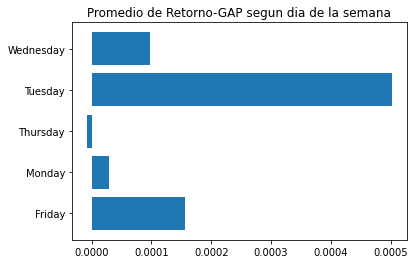

In [240]:
plt.figure()                                #Figura 
x_values1 = dia_inversion_gap.index.tolist()
y_values1 = dia_inversion_gap.GAP_Return.tolist()

plt.barh(x_values1, y_values1)               #El gráfico
plt.title('Promedio de Retorno-GAP segun dia de la semana')              #El título

<Figure size 720x720 with 0 Axes>

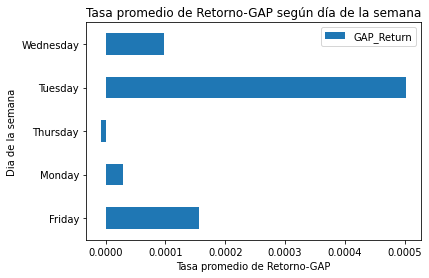

In [241]:
plt.figure(figsize=(10,10))
dia_inversion_gap.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según día de la semana')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Dia de la semana')
plt.show()

In [242]:
df_retorno_intra= pd.DataFrame()
df_retorno_intra=df_global[['WeekDay','Intradaily_Return']]
df_retorno_intra

,WeekDay,Intradaily_Return
2798,Monday,0.000000
2799,Tuesday,0.000000
2800,Wednesday,0.000000
2801,Thursday,0.000000
2802,Friday,0.000000
...,...,...
2794,Thursday,-0.003833
2795,Monday,0.015866
2796,Tuesday,0.011189
2797,Wednesday,-0.021077


In [243]:
dia_inversion_intra=df_retorno_intra.groupby(['WeekDay']).mean()
dia_inversion_intra

,Intradaily_Return
WeekDay,
Friday,-0.000215
Monday,0.000297
Thursday,-0.000456
Tuesday,-0.000232
Wednesday,-0.000206


Text(0, 0.5, 'Dia de la semana')

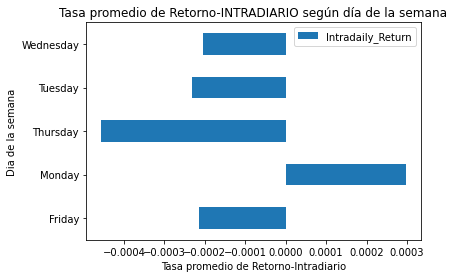

In [244]:
dia_inversion_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.xlabel('Tasa promedio de Retorno-Intradiario')
plt.ylabel('Dia de la semana')

In [ ]:
micro = yf.download('MSFT', start='2010-01-01')
micro.reset_index(inplace=True)
micro.head()

In [ ]:
micro.info()

In [ ]:
micro.tail(10)

In [ ]:
micro.info()

In [ ]:
msft = yf.Ticker("MSFT")

In [ ]:
msft.info

In [ ]:
msft.actions

In [ ]:
msft.calendar

In [ ]:
plt.figure(figsize=(12, 5))
f1 = plt.plot(micro_fil.Date, micro_fil['Adj Close'], c = 'k', ls = '-', lw = 1.5)
f1 = plt.plot(micro_fil.Date, micro_fil['SMA50'], c = 'k', ls = 'solid', lw = 0.5)
plt.xlabel('Tiempo')
plt.ylabel('Activo Microsoft')
plt.legend(['Precio', 'SMA 50'], loc = 'lower right', fontsize = 14)
plt.plot(micro_fil.Date, micro_fil['mPos'], '^',c='g')
plt.plot(micro_fil.Date, micro_fil['mneg'], 'v',c='r')
plt.show()

In [ ]:
retornos_gaps = np.log(aperturas/cierres.shift(1)).fillna(0)

retornos_intra = np.log(cierres/aperturas).fillna(0)

variaciones = activo.cierre_ajustado.pct_change()

volatilidad = activos.variaciones.rolling(250).std()*100*(250)**0.5 # (en este caso se puede utilizar el indice VIX)

In [ ]:
variaciones = micro.Adj_Close.pct_change()